In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data into a dataframe
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#show the number of columns and number
df.shape

(7043, 21)

In [4]:
#show all of the columns
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
#check for missing data or na values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#show some statistic
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#get customer churn count
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

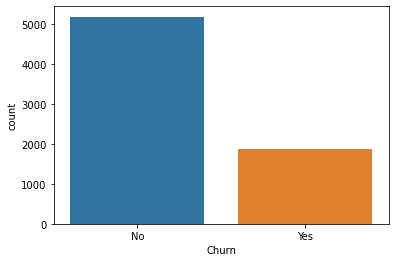

In [8]:
#visualize the count of customer shurn
sns.countplot(df['Churn'])

In [9]:
#what is the precentage of customer that are leaving
num_retained = df[df.Churn == 'No'].shape[0]
num_churn = df[df.Churn == 'Yes'].shape[0]

#print the precentage of customer that stayed
print(num_retained/(num_retained + num_churn)*100,'% customer stayed with the company')

#print the precentage of customer that left
print(num_churn/(num_retained + num_churn)*100,'% customer left with the company')

73.4630129206304 % customer stayed with the company
26.536987079369588 % customer left with the company


<AxesSubplot:xlabel='gender', ylabel='count'>

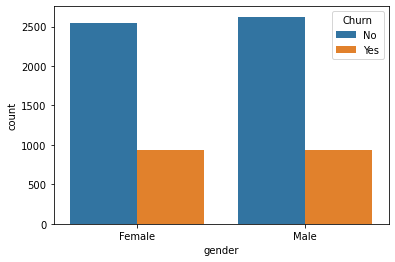

In [10]:
#visualize the churn count for both male or female
sns.countplot(x='gender',hue='Churn',data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

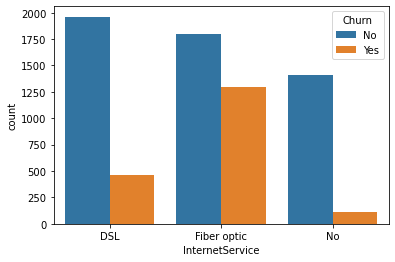

In [11]:
#visualize the churn count for the internet service
sns.countplot(x='InternetService',hue='Churn',data=df)

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

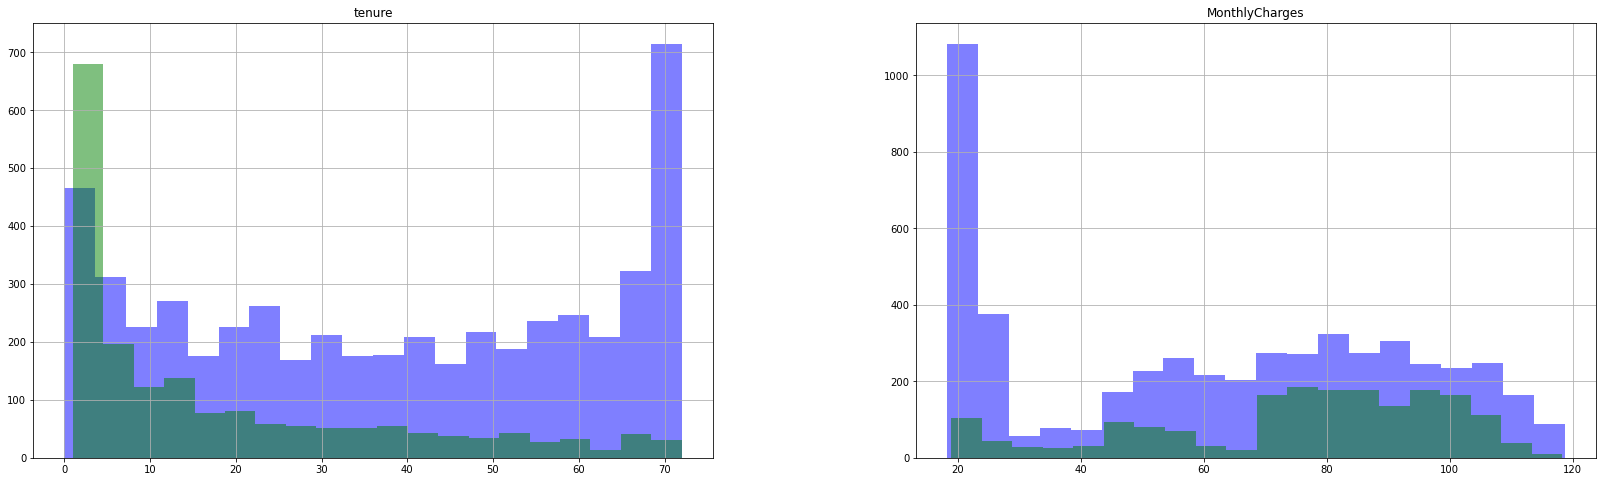

In [12]:
numerical_feature =['tenure','MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize=(28,8))
df[df.Churn == 'No'][numerical_feature].hist(bins=20,color='blue',alpha=0.5,ax=ax)
df[df.Churn == 'Yes'][numerical_feature].hist(bins=20,color='green',alpha=0.5,ax=ax)

In [13]:
#remove unnecessary columns
clean_df = df.drop('customerID',axis=1)

In [14]:
#look at the number rows and cols in the data set
clean_df.shape

(7043, 20)

In [15]:
#convert all of the non-numeric columns to numeric
for column in clean_df.columns:
    if clean_df[column].dtype == np.number:
        continue
    clean_df[column] = LabelEncoder().fit_transform(clean_df[column])

In [16]:
#show the new data set data types
clean_df.dtypes

gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int32
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [17]:
#show the first five rows
clean_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [18]:
#scaled the data
X = clean_df.drop('Churn',axis=1)
y = clean_df['Churn']

X = StandardScaler().fit_transform(X)

In [19]:
#split the data into 80% training and 20$ testing
x_train , x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [20]:
#create the model
model = LogisticRegression()
#train the model
model.fit(x_train,y_train)

LogisticRegression()

In [21]:
#create the prediction on the test data  
prediction = model.predict(x_test)

#print the prediction
print(prediction)

[1 0 0 ... 0 0 0]


In [22]:
#check the precission,recall,f1-score
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

